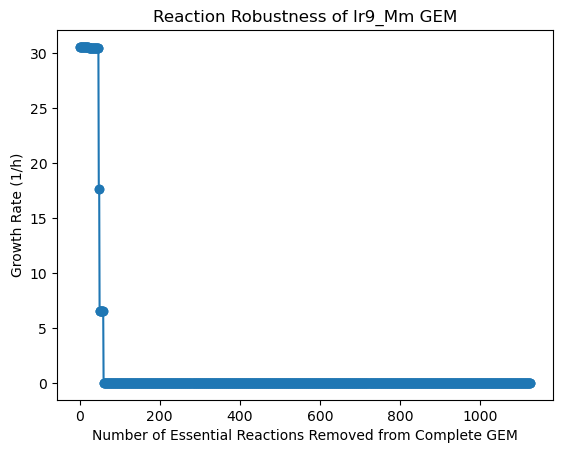

In [13]:
# Author: William Scott

# Importing necessary libraries
import cobra
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the metabolic model
model = cobra.io.read_sbml_model('/Users/williamscott/Library/CloudStorage/OneDrive-WageningenUniversity&Research/UNLOCK/Projects/Tick_Mitocholria_Project/Genome-Scale_Models/Ir9_Rh.xml')

# Step 2: Define a function to calculate growth rate
def calculate_growth_rate(model):
    # Set the objective to maximize biomass production
    model.objective = 'Growth'

    # Optimize the model to calculate growth rate
    solution = model.optimize()

    # Return the growth rate
    return solution.objective_value

# Step 3: Define a function to determine reaction robustness
def determine_reaction_robustness(model):
    # Create empty lists to store the reaction robustness data
    growth_rates = []
    num_reactions = []

    # Store the original model state
    original_state = model.copy()

    # Get the total number of reactions in the model
    total_reactions = len(model.reactions)

    # Loop through different numbers of reactions being present in the model
    for num in range(total_reactions + 1):
        # Disable the reactions by setting their bounds to zero
        for i, reaction in enumerate(model.reactions):
            if i < num:
                reaction.lower_bound = 0.0
                reaction.upper_bound = 0.0
            else:
                break

        # Calculate growth rate after reaction knockouts
        growth_rate = calculate_growth_rate(model)

        # Store the growth rate and number of reactions
        growth_rates.append(growth_rate)
        num_reactions.append(num)

        # Reset the model to the original state
        model = original_state.copy()

    # Return the reaction robustness data
    return growth_rates, num_reactions

# Step 4: Main code to determine reaction robustness and plot the results
def main():
    # Determine reaction robustness
    growth_rates, num_reactions = determine_reaction_robustness(model)

    # Plotting the results
    plt.plot(num_reactions, growth_rates, marker='o')
    plt.xlabel('Number of Essential Reactions Removed from Complete GEM')
    plt.ylabel('Growth Rate (1/h)')
    plt.title('Reaction Robustness of Ir9_Rh GEM')
    plt.grid(False)
    plt.show()

# Step 5: Call the main function to execute the code
if __name__ == '__main__':
    main()
# Importing necessary libraries
import cobra
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the metabolic model
model = cobra.io.read_sbml_model('/Users/williamscott/Library/CloudStorage/OneDrive-WageningenUniversity&Research/UNLOCK/Projects/Tick_Mitocholria_Project/Genome-Scale_Models/Ir9_Mm.xml')

# Step 2: Define a function to calculate growth rate
def calculate_growth_rate(model):
    # Set the objective to maximize biomass production
    model.objective = 'Growth'

    # Optimize the model to calculate growth rate
    solution = model.optimize()

    # Return the growth rate
    return solution.objective_value

# Step 3: Define a function to determine reaction robustness
def determine_reaction_robustness(model):
    # Create empty lists to store the reaction robustness data
    growth_rates = []
    num_reactions = []

    # Store the original model state
    original_state = model.copy()

    # Get the total number of reactions in the model
    total_reactions = len(model.reactions)

    # Loop through different numbers of reactions being present in the model
    for num in range(total_reactions + 1):
        # Disable the reactions by setting their bounds to zero
        for i, reaction in enumerate(model.reactions):
            if i < num:
                reaction.lower_bound = 0.0
                reaction.upper_bound = 0.0
            else:
                break

        # Calculate growth rate after reaction knockouts
        growth_rate = calculate_growth_rate(model)

        # Store the growth rate and number of reactions
        growth_rates.append(growth_rate)
        num_reactions.append(num)

        # Reset the model to the original state
        model = original_state.copy()

    # Return the reaction robustness data
    return growth_rates, num_reactions

# Step 4: Main code to determine reaction robustness and plot the results
def main():
    # Determine reaction robustness
    growth_rates, num_reactions = determine_reaction_robustness(model)

    # Plotting the results
    plt.plot(num_reactions, growth_rates, marker='o')
    plt.xlabel('Number of Essential Reactions Removed from Complete GEM')
    # Setting the background color of the plot
# using set_facecolor() method
#ax.set_facecolor("white")
    plt.ylabel('Growth Rate (1/h)')
    plt.title('Reaction Robustness of Ir9_Mm GEM')
    plt.grid(False)
    plt.show()

# Step 5: Call the main function to execute the code
if __name__ == '__main__':
    main()